In this guided project, we'll work with a dataset of used cars from eBay Kleinanzeigen, a classifieds section of the German eBay website.

The aim of this project is to clean the data and analyze the included used car listings.

Let's start by importing the libraries we need and reading the dataset into pandas.

In [240]:
import pandas as pd
import numpy as np

autos = pd.read_csv('datasets/autos.csv', encoding = "Latin-1")

In [241]:
autos.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,odometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-26 17:47:46,Peugeot_807_160_NAVTECH_ON_BOARD,privat,Angebot,"$5,000",control,bus,2004,manuell,158,andere,"150,000km",3,lpg,peugeot,nein,2016-03-26 00:00:00,0,79588,2016-04-06 06:45:54
1,2016-04-04 13:38:56,BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik,privat,Angebot,"$8,500",control,limousine,1997,automatik,286,7er,"150,000km",6,benzin,bmw,nein,2016-04-04 00:00:00,0,71034,2016-04-06 14:45:08
2,2016-03-26 18:57:24,Volkswagen_Golf_1.6_United,privat,Angebot,"$8,990",test,limousine,2009,manuell,102,golf,"70,000km",7,benzin,volkswagen,nein,2016-03-26 00:00:00,0,35394,2016-04-06 20:15:37
3,2016-03-12 16:58:10,Smart_smart_fortwo_coupe_softouch/F1/Klima/Pan...,privat,Angebot,"$4,350",control,kleinwagen,2007,automatik,71,fortwo,"70,000km",6,benzin,smart,nein,2016-03-12 00:00:00,0,33729,2016-03-15 03:16:28
4,2016-04-01 14:38:50,Ford_Focus_1_6_Benzin_TÜV_neu_ist_sehr_gepfleg...,privat,Angebot,"$1,350",test,kombi,2003,manuell,0,focus,"150,000km",7,benzin,ford,nein,2016-04-01 00:00:00,0,39218,2016-04-01 14:38:50


In [242]:
autos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   dateCrawled          50000 non-null  object
 1   name                 50000 non-null  object
 2   seller               50000 non-null  object
 3   offerType            50000 non-null  object
 4   price                50000 non-null  object
 5   abtest               50000 non-null  object
 6   vehicleType          44905 non-null  object
 7   yearOfRegistration   50000 non-null  int64 
 8   gearbox              47320 non-null  object
 9   powerPS              50000 non-null  int64 
 10  model                47242 non-null  object
 11  odometer             50000 non-null  object
 12  monthOfRegistration  50000 non-null  int64 
 13  fuelType             45518 non-null  object
 14  brand                50000 non-null  object
 15  notRepairedDamage    40171 non-null  object
 16  date

The dataset contains 20 columns, most of which are strings.
Some columns have null values, but none have more than ~20% null values.

We'll convert the column names from camelcase to snakecase and reword some of the column names based on the data dictionary to be more descriptive

In [243]:
autos.columns

Index(['dateCrawled', 'name', 'seller', 'offerType', 'price', 'abtest',
       'vehicleType', 'yearOfRegistration', 'gearbox', 'powerPS', 'model',
       'odometer', 'monthOfRegistration', 'fuelType', 'brand',
       'notRepairedDamage', 'dateCreated', 'nrOfPictures', 'postalCode',
       'lastSeen'],
      dtype='object')

In [244]:
autos.columns = ['date_crawled', 'name', 'seller', 'offer_type', 'price', 'abtest',
       'vehicle_type', 'registration_year', 'gearbox', 'power_ps', 'model',
       'odometer', 'registration_month', 'fuel_type', 'brand',
       'unrepaired_damage', 'ad_created', 'nr_of_pictures', 'postal_code',
       'last_seen']

In [246]:
autos.head()

,date_crawled,name,seller,offer_type,price,abtest,vehicle_type,registration_year,gearbox,power_ps,model,odometer,registration_month,fuel_type,brand,unrepaired_damage,ad_created,nr_of_pictures,postal_code,last_seen
0,2016-03-26 17:47:46,Peugeot_807_160_NAVTECH_ON_BOARD,privat,Angebot,"$5,000",control,bus,2004,manuell,158,andere,"150,000km",3,lpg,peugeot,nein,2016-03-26 00:00:00,0,79588,2016-04-06 06:45:54
1,2016-04-04 13:38:56,BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik,privat,Angebot,"$8,500",control,limousine,1997,automatik,286,7er,"150,000km",6,benzin,bmw,nein,2016-04-04 00:00:00,0,71034,2016-04-06 14:45:08
2,2016-03-26 18:57:24,Volkswagen_Golf_1.6_United,privat,Angebot,"$8,990",test,limousine,2009,manuell,102,golf,"70,000km",7,benzin,volkswagen,nein,2016-03-26 00:00:00,0,35394,2016-04-06 20:15:37
3,2016-03-12 16:58:10,Smart_smart_fortwo_coupe_softouch/F1/Klima/Pan...,privat,Angebot,"$4,350",control,kleinwagen,2007,automatik,71,fortwo,"70,000km",6,benzin,smart,nein,2016-03-12 00:00:00,0,33729,2016-03-15 03:16:28
4,2016-04-01 14:38:50,Ford_Focus_1_6_Benzin_TÜV_neu_ist_sehr_gepfleg...,privat,Angebot,"$1,350",test,kombi,2003,manuell,0,focus,"150,000km",7,benzin,ford,nein,2016-04-01 00:00:00,0,39218,2016-04-01 14:38:50


Now let's do some basic data exploration to determine what other cleaning tasks need to be done. Initially we will look for:

* Text columns where all or almost all values are the same. These can often be dropped as they don't have useful information for analysis.
* Examples of numeric data stored as text which can be cleaned and converted.

In [247]:
autos.describe(include = "all")

,date_crawled,name,seller,offer_type,price,abtest,vehicle_type,registration_year,gearbox,power_ps,model,odometer,registration_month,fuel_type,brand,unrepaired_damage,ad_created,nr_of_pictures,postal_code,last_seen
count,50000,50000,50000,50000,50000,50000,44905,50000.000000,47320,50000.000000,47242,50000,50000.000000,45518,50000,40171,50000,50000.0,50000.000000,50000
unique,48213,38754,2,2,2357,2,8,NaN,2,NaN,245,13,NaN,7,40,2,76,NaN,NaN,39481
top,2016-04-02 11:37:04,Ford_Fiesta,privat,Angebot,$0,test,limousine,NaN,manuell,NaN,golf,"150,000km",NaN,benzin,volkswagen,nein,2016-04-03 00:00:00,NaN,NaN,2016-04-07 06:17:27
freq,3,78,49999,49999,1421,25756,12859,NaN,36993,NaN,4024,32424,NaN,30107,10687,35232,1946,NaN,NaN,8
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2005.073280,NaN,116.355920,NaN,NaN,5.723360,NaN,NaN,NaN,NaN,0.0,50813.627300,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,105.712813,NaN,209.216627,NaN,NaN,3.711984,NaN,NaN,NaN,NaN,0.0,25779.747957,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1000.000000,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,0.0,1067.000000,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1999.000000,NaN,70.000000,NaN,NaN,3.000000,NaN,NaN,NaN,NaN,0.0,30451.000000,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2003.000000,NaN,105.000000,NaN,NaN,6.000000,NaN,NaN,NaN,NaN,0.0,49577.000000,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2008.000000,NaN,150.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,0.0,71540.000000,NaN


We'll look closer at *seller* and *offer_type* columns since they only have 2 unique values.

In [248]:
autos["seller"].value_counts()

privat        49999
gewerblich        1
Name: seller, dtype: int64

We notice that all values except 1 are "privat" so we'll drop this column.

In [249]:
autos["offer_type"].value_counts()

Angebot    49999
Gesuch         1
Name: offer_type, dtype: int64

Same applies to *offer_type* column.

In [148]:
autos.drop(["seller", "offer_type"], axis=1, inplace=True)

The *price* and *odometer* columns are numeric values stored as text. For each column:
* We'll remove any non-numeric characters.
* Convert the column to a numeric dtype.

In [149]:
autos["price"] = (autos["price"]
                          .str.replace("$","")
                          .str.replace(",","")
                          .astype(int)
                          )

In [150]:
autos["odometer"] = (autos["odometer"]
                             .str.replace("km","")
                             .str.replace(",","")
                             .astype(int)
                             )

In [151]:
autos.rename(columns={"odometer":"odometer_km"}, inplace=True)

In [152]:
autos.head()

,date_crawled,name,price,abtest,vehicle_type,registration_year,gearbox,power_ps,model,odometer_km,registration_month,fuel_type,brand,unrepaired_damage,ad_created,nr_of_pictures,postal_code,last_seen
0,2016-03-26 17:47:46,Peugeot_807_160_NAVTECH_ON_BOARD,5000,control,bus,2004,manuell,158,andere,150000,3,lpg,peugeot,nein,2016-03-26 00:00:00,0,79588,2016-04-06 06:45:54
1,2016-04-04 13:38:56,BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik,8500,control,limousine,1997,automatik,286,7er,150000,6,benzin,bmw,nein,2016-04-04 00:00:00,0,71034,2016-04-06 14:45:08
2,2016-03-26 18:57:24,Volkswagen_Golf_1.6_United,8990,test,limousine,2009,manuell,102,golf,70000,7,benzin,volkswagen,nein,2016-03-26 00:00:00,0,35394,2016-04-06 20:15:37
3,2016-03-12 16:58:10,Smart_smart_fortwo_coupe_softouch/F1/Klima/Pan...,4350,control,kleinwagen,2007,automatik,71,fortwo,70000,6,benzin,smart,nein,2016-03-12 00:00:00,0,33729,2016-03-15 03:16:28
4,2016-04-01 14:38:50,Ford_Focus_1_6_Benzin_TÜV_neu_ist_sehr_gepfleg...,1350,test,kombi,2003,manuell,0,focus,150000,7,benzin,ford,nein,2016-04-01 00:00:00,0,39218,2016-04-01 14:38:50


We'll continue exploring the data, specifically looking for data that doesn't look right. We'll start by analyzing the odometer_km and price columns.

In [153]:
autos["price"].value_counts().sort_index(ascending=False).head(15)

99999999    1
27322222    1
12345678    3
11111111    2
10000000    1
3890000     1
1300000     1
1234566     1
999999      2
999990      1
350000      1
345000      1
299000      1
295000      1
265000      1
Name: price, dtype: int64

In [154]:
autos["price"].value_counts().sort_index(ascending=True).head(10)

0     1421
1      156
2        3
3        1
5        2
8        1
9        1
10       7
11       2
12       3
Name: price, dtype: int64

There are 1421 that don't have a price. We can see that there are a few cars whose prices are above $1 million and 2 entries that are priced at 999999. We will remove these outliers. There is one car which costs 350000, out of curiosity we'll check the brand of the car to see if that is reasonable.

In [155]:
autos[autos['price'] == 350000]["name"]

36818    Porsche_991
Name: name, dtype: object

It'a Porche 911 - that seeems reasonable.

In [156]:
#removing the outliers

autos = autos[autos["price"].between(1,350001)]

In [157]:
autos["price"].value_counts()

500      781
1500     734
2500     643
1200     639
1000     639
        ... 
14998      1
15470      1
9325       1
23650      1
566        1
Name: price, Length: 2346, dtype: int64

In [158]:
autos["price"].describe()

count     48565.000000
mean       5888.935591
std        9059.854754
min           1.000000
25%        1200.000000
50%        3000.000000
75%        7490.000000
max      350000.000000
Name: price, dtype: float64

Let's now move on to the date columns and understand the date range the data covers.

- `date_crawled`: added by the crawler
- `last_seen`: added by the crawler
- `ad_created`: from the website
- `registration_month`: from the website
- `registration_year`: from the website

Because some of these columns are represented as strings, we need to convert the data into a numerical representation so we can understand it quantitatively.

In [159]:
autos[['date_crawled','ad_created','last_seen']].head()

,date_crawled,ad_created,last_seen
0,2016-03-26 17:47:46,2016-03-26 00:00:00,2016-04-06 06:45:54
1,2016-04-04 13:38:56,2016-04-04 00:00:00,2016-04-06 14:45:08
2,2016-03-26 18:57:24,2016-03-26 00:00:00,2016-04-06 20:15:37
3,2016-03-12 16:58:10,2016-03-12 00:00:00,2016-03-15 03:16:28
4,2016-04-01 14:38:50,2016-04-01 00:00:00,2016-04-01 14:38:50


To understand the date range, we can extract just the date values and generate a distribution, and then sort by the index.

In [160]:
(autos['date_crawled']
                     .str[:10]
                     .value_counts( normalize=True, dropna=False) #normalize gets us percentages
                     .sort_index()
)

2016-03-05    0.025327
2016-03-06    0.014043
2016-03-07    0.036014
2016-03-08    0.033296
2016-03-09    0.033090
2016-03-10    0.032184
2016-03-11    0.032575
2016-03-12    0.036920
2016-03-13    0.015670
2016-03-14    0.036549
2016-03-15    0.034284
2016-03-16    0.029610
2016-03-17    0.031628
2016-03-18    0.012911
2016-03-19    0.034778
2016-03-20    0.037887
2016-03-21    0.037373
2016-03-22    0.032987
2016-03-23    0.032225
2016-03-24    0.029342
2016-03-25    0.031607
2016-03-26    0.032204
2016-03-27    0.031092
2016-03-28    0.034860
2016-03-29    0.034099
2016-03-30    0.033687
2016-03-31    0.031834
2016-04-01    0.033687
2016-04-02    0.035478
2016-04-03    0.038608
2016-04-04    0.036487
2016-04-05    0.013096
2016-04-06    0.003171
2016-04-07    0.001400
Name: date_crawled, dtype: float64

There are days when there were fewer entries crawled, which has either to do with the nr of ads posted on those days or the crawler itself.

In [161]:
(autos['ad_created']
                     .str[:10]
                     .value_counts( normalize=True, dropna=False) #normalize gets us percentages
                     .sort_index()
)

2015-06-11    0.000021
2015-08-10    0.000021
2015-09-09    0.000021
2015-11-10    0.000021
2015-12-05    0.000021
                ...   
2016-04-03    0.038855
2016-04-04    0.036858
2016-04-05    0.011819
2016-04-06    0.003253
2016-04-07    0.001256
Name: ad_created, Length: 76, dtype: float64

Next, we try to understand the distribution of `registration_year`

In [162]:
autos["registration_year"].describe()

count    48565.000000
mean      2004.755421
std         88.643887
min       1000.000000
25%       1999.000000
50%       2004.000000
75%       2008.000000
max       9999.000000
Name: registration_year, dtype: float64

We notice that we have cars registered in year 1000 and 9999. We'll keep the values which are in a reasonable range.

In [173]:
autos = autos[autos["registration_year"].between(1900, 2016)]

In [174]:
autos["registration_year"].value_counts()

2000    3156
2005    2936
1999    2897
2004    2703
2003    2699
        ... 
1938       1
1948       1
1927       1
1931       1
1952       1
Name: registration_year, Length: 78, dtype: int64

We will keep all the cars since 1900 until 2016 since cars cannot be registrated at a later date then the one posted in the ad.

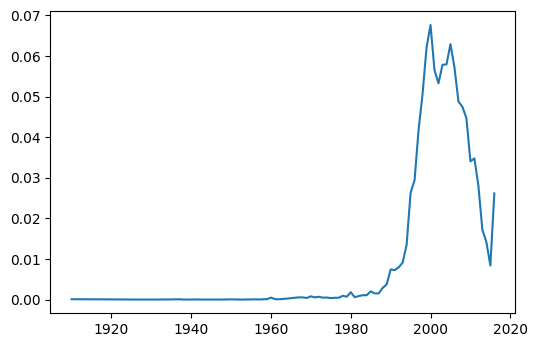

In [180]:
%matplotlib inline
autos["registration_year"].value_counts(normalize=True).sort_index().plot();

We see that most cars were registered between 1990 and 2016.

Next, we will explore variations across different car brands. We will select the top 10 brands in terms of ads posted.

In [200]:
top10 = autos["brand"].value_counts()[:10].index

In [205]:
avg_prices = {}

for brand in top10:
    mask = autos["brand"] == brand
    avg_prices[brand] = int(autos[mask]["price"].mean())

In [225]:
avg_prices

volkswagen       5402
bmw              8332
opel             2975
mercedes_benz    8628
audi             9336
ford             3749
renault          2474
peugeot          3094
fiat             2813
seat             4397
dtype: int64

We notice a range of prices, from the more expensive (Audi, BMW) to less expensive (Ford, Opel).

Next we'll use aggregation to understand the average mileage for those cars and if there's any visible link with mean price.

In [213]:
avg_mileage = {}

for brand in top10:
    mask = autos["brand"] == brand
    avg_mileage[brand] = int(autos[mask]['odometer_km'].mean())

In [226]:
avg_mileage

volkswagen       128707
bmw              132572
opel             129310
mercedes_benz    130788
audi             129157
ford             124266
renault          128071
peugeot          127153
fiat             117121
seat             121131
dtype: int64

Let's create a dataframe with the combined dictionaries.

In [220]:
avg_prices = pd.Series(avg_prices)

In [221]:
avg_mileage = pd.Series(avg_mileage)

In [229]:
avg_mileage.shape

(10,)

In [235]:
top10 = pd.DataFrame(avg_prices, columns=['avg_prices'])
top10["avg_mileage"] = avg_mileage

In [236]:
top10

,avg_prices,avg_mileage
volkswagen,5402,128707
bmw,8332,132572
opel,2975,129310
mercedes_benz,8628,130788
audi,9336,129157
ford,3749,124266
renault,2474,128071
peugeot,3094,127153
fiat,2813,117121
seat,4397,121131


In [239]:
top10.sort_values(by="avg_mileage", ascending = False)

,avg_prices,avg_mileage
bmw,8332,132572
mercedes_benz,8628,130788
opel,2975,129310
audi,9336,129157
volkswagen,5402,128707
renault,2474,128071
peugeot,3094,127153
ford,3749,124266
seat,4397,121131
fiat,2813,117121


At the first glance, we see no link between average prices and average mileage between brands. While some of the most expensive cars have a high mileage, we notice that Opel (cheap car) places 3rd in terms of mileage. 